## Data Wrangling

In [1]:
#Required Libraries
import pandas as pd
import numpy as np
import tweepy
import requests
import matplotlib.pyplot as plt
import json
import datetime
import os
from tweepy import OAuthHandler
from timeit import default_timer as timer
import re
import seaborn as sns
%matplotlib inline

### Gather Data

In [2]:
#read twitter-archive data
archive_df = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
#Load Image predicton tsv file
if not os.path.exists('image-predictions.csv'):
    tsv_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
    image_prediction_df = pd.read_csv(tsv_url, sep='\t')
    image_prediction_df.to_csv('image-predictions.csv', index=False)
else:
    image_prediction_df = pd.read_csv('image-predictions.csv')


#Load Retweet and favourite count API
consumer_key=''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.AppAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.api(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
#API Quering
errors=[]
if not os.path.exists('tweet_json.txt'):
    #Create the file
    with open('tweet_json.txt', 'wb') as file:
        for tweet_id in archive_df['tweet_id']:
            try:
                status = api.get_status(tweet_id, wait_on_rate_limit=True, wait_on_rate_limit_notify=True, tweet_mode='extended')
                json.dump(status._json, file)
                file.write('\n')
            except Exception as e:
                print('Error on tweet ID: {}'.format(tweet_id)+';'+str(e))
                errors.append(tweet_id)


In [ ]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = archive_df.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Fail
2: 892177421306343426
Fail
3: 891815181378084864
Fail
4: 891689557279858688
Fail
5: 891327558926688256
Fail
6: 891087950875897856
Fail
7: 890971913173991426
Fail
8: 890729181411237888
Fail
9: 890609185150312448
Fail
10: 890240255349198849
Fail
11: 890006608113172480
Fail
12: 889880896479866881
Fail
13: 889665388333682689
Fail
14: 889638837579907072
Fail
15: 889531135344209921
Fail
16: 889278841981685760
Fail
17: 888917238123831296
Fail
18: 888804989199671297
Fail
19: 888554962724278272
Fail
20: 888202515573088257
Fail
21: 888078434458587136
Fail
22: 887705289381826560
Fail
23: 887517139158093824
Fail
24: 887473957103951883
Fail
25: 887343217045368832
Fail
26: 887101392804085760
Fail
27: 886983233522544640
Fail
28: 886736880519319552
Fail
29: 886680336477933568
Fail
30: 886366144734445568
Fail
31: 886267009285017600
Fail
32: 886258384151887873
Fail
33: 886054160059072513
Fail
34: 885984800019947520
Fail
35: 885528943205470208
Fail
36: 885518971528720385
Fail
3

Fail
289: 838476387338051585
Fail
290: 838201503651401729
Fail
291: 838150277551247360
Fail
292: 838085839343206401
Fail
293: 838083903487373313
Fail
294: 837820167694528512
Fail
295: 837482249356513284
Fail
296: 837471256429613056
Fail
297: 837366284874571778
Fail
298: 837110210464448512


In [4]:
#Reading JSON API File
tweet_list = []
with open('tweet_json.txt', 'r') as file:
    for line in file:
        tweet = json.loads(line)
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        fav_count = tweet['favorite_count']
        followers_count = tweet['user']['followers_count']
        tweet_list.append({'tweet_id': tweet_id,
                           'retweet_count': retweet_count,
                            'favorite_count': fav_count,
                            'followers_count': followers_count})
api_df = pd.DataFrame(tweet_list)

### Assess

In [5]:
archive_df.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [10]:
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
favorite_count     2354 non-null int64
followers_count    2354 non-null int64
retweet_count      2354 non-null int64
tweet_id           2354 non-null int64
dtypes: int64(4)
memory usage: 73.6 KB


In [6]:
api_df.sample(5)

,favorite_count,followers_count,retweet_count,tweet_id
1678,3464,3200952,1722,682003177596559360
97,7467,3200891,1667,873213775632977920
1431,3748,3200950,1552,697463031882764288
1651,2676,3200952,761,683462770029932544
1223,4673,3200947,1569,714141408463036416


In [7]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [17]:
image_prediction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [7]:
image_prediction_df.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1823,834931633769889797,https://pbs.twimg.com/media/C5ZF4p-XEAEmApg.jpg,1,ice_bear,0.330573,False,soft-coated_wheaten_terrier,0.196476,True,Irish_terrier,0.073097,True
470,675113801096802304,https://pbs.twimg.com/media/CV58a4nXAAApywo.jpg,1,bow,0.168020,False,quill,0.108807,False,joystick,0.043312,False
487,675501075957489664,https://pbs.twimg.com/media/CV_cnjHWUAADc-c.jpg,1,dough,0.806757,False,bakery,0.027907,False,French_loaf,0.018189,False
789,690597161306841088,https://pbs.twimg.com/media/CZV-c9NVIAEWtiU.jpg,1,Lhasa,0.097500,True,koala,0.091934,False,sunglasses,0.091505,False
1369,761976711479193600,https://pbs.twimg.com/media/CpMVxoRXgAAh350.jpg,3,Labrador_retriever,0.475552,True,Chesapeake_Bay_retriever,0.082898,True,Staffordshire_bullterrier,0.048464,True


In [13]:
image_prediction_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [15]:
image_prediction_df.sample(4)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
1808,832636094638288896,https://pbs.twimg.com/media/C44eG7oUMAAA4Ss.jpg,1,Eskimo_dog,0.525032,True,Siberian_husky,0.252238,True,malamute,0.216839,True
1984,872122724285648897,https://pbs.twimg.com/media/DBpm-5UXcAUeCru.jpg,1,basketball,0.808396,False,pug,0.066736,True,dalmatian,0.054570,True
983,707411934438625280,https://pbs.twimg.com/media/CdE7ZktXIAEiWLj.jpg,1,Lakeland_terrier,0.738277,True,Airedale,0.028515,True,giant_schnauzer,0.024876,True


In [6]:
#Check column Duplicates
all_col = pd.Series(list(archive_df)+list(image_prediction_df)+list(api_df))
all_col [all_col.duplicated()]

18    tweet_id
33    tweet_id
dtype: object

In [41]:
image_prediction_df[image_prediction_df.p2_conf == image_prediction_df.p2_conf.min()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
106,667866724293877760,https://pbs.twimg.com/media/CUS9PlUWwAANeAD.jpg,1,jigsaw_puzzle,1.0,False,prayer_rug,1.011300e-08,False,doormat,1.740170e-10,False


In [45]:
image_prediction_df.tweet_id.nunique()

2075

#### Quality Issues
##### Archive Table
- Timestamp is string type---------------------------
- Timestamp include +0000-----------------
- Dog type(doggo, floofer...) include 'None' values instead of 'Nan'-------------
- retweeted_status_timestamp is not timestamp type----------------------------------
- retweeted_status_id, retweeted_status_user_id is float not int---------------------
- Delete retweets column----------------------
- Missing values in name column-----------
- Wrong name values 'a', 'an','the','by'----
- Missing values in 'Expanded url' column {retweets}----------------


##### Image Table
- Column name are not expressive------------------

##### API Table
- Number of entries bigger than Tweets number

#### Tidiness Issues
- Dog type are separated in four columns--------------------------
- In Image prediction table most common columns are values not variables--------------------------

### Clean

In [24]:
#take a copy from all DF
archive_copy = archive_df.copy()
image_copy = image_prediction_df.copy()
api_copy = api_df.copy()

###### treatments: - Wrong name values 'a', 'an'

##### Define
- Replace 'the', 'by', 'a' & 'an' with correct name extracted from text column
- Repalce 'None' with correct name or else replace with Nan

#### Code

In [37]:
pattern = re.compile('(?:name(?:d)?)\s{1}(?:is\s)?([A-Za-z]+)')
for index, row in archive_copy.iterrows():
    try:
        if row['name']=='a' or row['name']=='an':
            correction = re.findall(pattern, row['text'])[0]
            archive_copy.name[index] = archive_copy.name[index].replace('a', correction)
            archive_copy.name[index] = archive_copy.name[index].replace('an', correction)
        if row['name']== 'the':
            correction = re.findall(pattern, row['text'])[0]
            archive_copy.name[index] = archive_copy.name[index].replace('the', correction)
        if row['name']== 'by':
            correction = re.findall(pattern, row['text'])[0]
            archive_copy.name[index] = archive_copy.name[index].replace('by', correction)
        if row['name']== 'None':
            correction = re.findall(pattern, row['text'])[0]
            archive_copy.name[index] = archive_copy.name[index].replace('None', correction)
    except IndexError:
        archive_copy.name[index] = np.nan

##### test

In [33]:
archive_copy[archive_copy.name == 'the']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
35,885518971528720385,NaN,NaN,2017-07-13 15:19:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I have a new hero and his name is Howard. 14/1...,NaN,NaN,NaN,https://twitter.com/4bonds2carbon/status/88551...,14,10,Howard,None,None,None,None


In [32]:
archive_copy.name.value_counts()

Charlie     12
Cooper      11
Oliver      11
Lucy        11
Penny       10
Tucker      10
Lola        10
Bo           9
Winston      9
Sadie        8
Buddy        7
Daisy        7
Toby         7
Bailey       7
Koda         6
Leo          6
Jax          6
Bella        6
Jack         6
Oscar        6
Scout        6
Rusty        6
Milo         6
Dave         6
Stanley      6
Sammy        5
Sunny        5
Bentley      5
Oakley       5
very         5
            ..
Pherb        1
Barry        1
Nugget       1
Hemry        1
Chesney      1
Mitch        1
Biden        1
Striker      1
Gustaf       1
Kanu         1
Bradlay      1
Kona         1
Tito         1
Kohl         1
Cilantro     1
Kingsley     1
Jacob        1
Ralpher      1
Pawnd        1
Tassy        1
Clyde        1
Bobble       1
Strider      1
Dewey        1
Strudel      1
Murphy       1
Carbon       1
Liam         1
Beckham      1
Harrison     1
Name: name, Length: 980, dtype: int64

###### treatments: -  Missing values in 'Expanded url' column {retweets}

##### Define
- Drop Misiing values in expanded url

#### Code

In [100]:
archive_clean = archive_copy.dropna(subset=['expanded_urls']).reset_index()

##### test

In [101]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2297 entries, 0 to 2296
Data columns (total 18 columns):
index                         2297 non-null int64
tweet_id                      2297 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2297 non-null object
source                        2297 non-null object
text                          2297 non-null object
retweeted_status_id           180 non-null float64
retweeted_status_user_id      180 non-null float64
retweeted_status_timestamp    180 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2297 non-null int64
rating_denominator            2297 non-null int64
name                          1573 non-null object
doggo                         2297 non-null object
floofer                       2297 non-null object
pupper                        2297 non-null object
puppo                         229

###### treatments: - Column name are not expressive in Image prediction table

##### Define
- Rename columns in image prediction table

#### Code

In [52]:
#rename columns
cols_name = ['tweet_id', 'jpg_url', 'img_num', 
       'prediction_1', 'confidence_1', 'breed_1',
       'prediction_2', 'confidence_2', 'breed_2',
       'prediction_3', 'confidence_3', 'breed_3']
image_copy.columns = cols_name

##### test

In [53]:
list(image_copy)

['tweet_id',
 'jpg_url',
 'img_num',
 'prediction_1',
 'confidence_1',
 'breed_1',
 'prediction_2',
 'confidence_2',
 'breed_2',
 'prediction_3',
 'confidence_3',
 'breed_3']

###### treatments:  - In Image prediction table most common columns are values not variables

##### Define
- Reshape Image prediction table

#### Code

In [54]:
#Reshaping Table
image_pred_clean = pd.wide_to_long(image_copy, i=['tweet_id', 'jpg_url','img_num'],
                                   stubnames=['prediction', 'confidence', 'breed'],
                                   j='prediction_phase',sep='_').reset_index()

##### test

In [55]:
image_pred_clean.sample(5)

,tweet_id,jpg_url,img_num,prediction_phase,prediction,confidence,breed
5290,826240494070030336,https://pbs.twimg.com/media/C3dlVMbXAAUd-Gh.jpg,1,2,pug,0.096242,True
2905,706346369204748288,https://pbs.twimg.com/media/Cc1yRE2WoAAgxFQ.jpg,1,2,Rottweiler,0.025381,True
6160,887705289381826560,https://pbs.twimg.com/media/DFHDQBbXgAEqY7t.jpg,1,2,redbone,0.087582,True
3760,748307329658011649,https://pbs.twimg.com/media/CmKFi-FXEAAeI37.jpg,2,2,shovel,0.038062,False
2612,697881462549430272,https://pbs.twimg.com/media/Ca9feqDUAAA_z7T.jpg,1,3,toilet_tissue,0.098029,False


In [76]:
image_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6225 entries, 0 to 6224
Data columns (total 7 columns):
tweet_id            6225 non-null int64
jpg_url             6225 non-null object
img_num             6225 non-null int64
prediction_phase    6225 non-null int64
prediction          6225 non-null object
confidence          6225 non-null float64
breed               6225 non-null bool
dtypes: bool(1), float64(1), int64(3), object(2)
memory usage: 298.0+ KB


###### treatments: -  Tweets without images & Images for retweet

##### Define
- Drop Tweets without image
- Drop retweets columns
- Drop images for retweet 

#### Code

In [104]:
#create a list of unique id from image table
tweets_with_image = list(image_pred_clean.tweet_id.unique())
#Clean tweets without images
archive_clean2 = archive_clean[archive_clean.tweet_id.isin(tweets_with_image)].reset_index()

In [106]:
#create dataframe for retweets
retweets = archive_clean2.retweeted_status_id.notnull()
archive_clean2[retweets].shape[0]
#Drop retweets
archive_clean2 = archive_clean2[~retweets]
#create dataframe for reply
replys = archive_clean2.in_reply_to_status_id.notnull()
#Drop replys
archive_clean2 = archive_clean2[~replys]

In [112]:
archive_clean3 = archive_clean2.reset_index(drop=True)

In [114]:
#create list of unique id from archive
tweets = list(archive_clean3.tweet_id)
# Clean images of retweets
image_pred_clean2 = image_pred_clean[image_pred_clean.tweet_id.isin(tweets)]

In [115]:
image_pred_clean2.reset_index(inplace=True)

##### test

In [113]:
archive_clean3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1971 entries, 0 to 1970
Data columns (total 19 columns):
level_0                       1971 non-null int64
index                         1971 non-null int64
tweet_id                      1971 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     1971 non-null object
source                        1971 non-null object
text                          1971 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1971 non-null object
rating_numerator              1971 non-null int64
rating_denominator            1971 non-null int64
name                          1407 non-null object
doggo                         1971 non-null object
floofer                       1971 non-null object
pupper                        1971 non-nul

In [117]:
archive_clean3.sample(2)

,level_0,index,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1939,2265,2324,666421158376562688,NaN,NaN,2015-11-17 01:02:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",*internally screaming* 12/10 https://t.co/YMcr...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666421158...,12,10,NaN,None,None,None,None
1296,1598,1644,683852578183077888,NaN,NaN,2016-01-04 03:28:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Tiger. He's a penbroke (little do...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/683852578...,10,10,Tiger,None,None,None,None


In [116]:
image_pred_clean2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5913 entries, 0 to 5912
Data columns (total 8 columns):
index               5913 non-null int64
tweet_id            5913 non-null int64
jpg_url             5913 non-null object
img_num             5913 non-null int64
prediction_phase    5913 non-null int64
prediction          5913 non-null object
confidence          5913 non-null float64
breed               5913 non-null bool
dtypes: bool(1), float64(1), int64(4), object(2)
memory usage: 329.2+ KB


###### treatments: 
- retweeted_status_timestamp is not timestamp type
- retweeted_status_id, retweeted_status_user_id is float not int
- Delete retweets column

##### Define
- Drop (‘in_reply_to_status_id’, ‘in_reply_to_user_id’, ‘retweeted_status_id’, ‘retweeted_status_user_id’, ‘retweeted_status_timestamp’, 'index', 'level_0)from archive
- Drop('index') from image table

#### Code

In [119]:
archive_clean3 = archive_clean3.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'index', 'level_0'], axis=1)
image_pred_clean2 = image_pred_clean2.drop('index', axis=1)

##### test

In [120]:
archive_clean3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1971 entries, 0 to 1970
Data columns (total 12 columns):
tweet_id              1971 non-null int64
timestamp             1971 non-null object
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1407 non-null object
doggo                 1971 non-null object
floofer               1971 non-null object
pupper                1971 non-null object
puppo                 1971 non-null object
dtypes: int64(3), object(9)
memory usage: 184.9+ KB


In [121]:
image_pred_clean2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5913 entries, 0 to 5912
Data columns (total 7 columns):
tweet_id            5913 non-null int64
jpg_url             5913 non-null object
img_num             5913 non-null int64
prediction_phase    5913 non-null int64
prediction          5913 non-null object
confidence          5913 non-null float64
breed               5913 non-null bool
dtypes: bool(1), float64(1), int64(3), object(2)
memory usage: 283.0+ KB


###### treatments: 
- Dog type(doggo, floofer...) include 'None' values instead of 'Nan'
- Dog type are separated in four columns

##### Define
- Replace wrong values
- sum dog type at one column

#### Code

In [125]:
archive_clean3_copy = archive_clean3.copy()

In [127]:
#Remove none values with empty string to make it easy when combining column
archive_clean3_copy.doggo = archive_clean3_copy.doggo.replace('None','')
archive_clean3_copy.floofer = archive_clean3_copy.floofer.replace('None','')
archive_clean3_copy.pupper = archive_clean3_copy.pupper.replace('None','')
archive_clean3_copy.puppo = archive_clean3_copy.puppo.replace('None','')

In [131]:
#add dog type column
archive_clean3_copy['dog_stage'] = archive_clean3_copy['doggo']+archive_clean3_copy['floofer']+archive_clean3_copy['pupper']+archive_clean3_copy['puppo']
archive_clean3_copy = archive_clean3_copy.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

In [135]:
#Replace empty string
archive_clean3_copy.dog_stage = archive_clean3_copy.dog_stage.replace('',np.nan)
archive_clean3_copy.dog_stage = archive_clean3_copy.dog_stage.replace('doggopupper','doggo-pupper')
archive_clean3_copy.dog_stage = archive_clean3_copy.dog_stage.replace('doggopuppo','doggo-puppo')
archive_clean3_copy.dog_stage = archive_clean3_copy.dog_stage.replace('doggofloofer','doggo-floofer')

##### test

In [136]:
archive_clean3_copy.dog_stage.value_counts()

pupper           201
doggo             63
puppo             22
doggo-pupper       8
floofer            7
doggo-floofer      1
doggo-puppo        1
Name: dog_stage, dtype: int64

In [137]:
archive_clean3_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1971 entries, 0 to 1970
Data columns (total 9 columns):
tweet_id              1971 non-null int64
timestamp             1971 non-null object
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1407 non-null object
dog_stage             303 non-null object
dtypes: int64(3), object(6)
memory usage: 138.7+ KB


In [140]:
archive_clean3_copy.sample(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
1913,667073648344346624,2015-11-18 20:15:26,"<a href=""http://twitter.com/download/iphone"" r...",Here is Dave. He is actually just a skinny leg...,https://twitter.com/dog_rates/status/667073648...,10,10,Dave,NaN
391,808838249661788160,2016-12-14 00:57:20,"<a href=""http://twitter.com/download/iphone"" r...",This is Ito. He'll be your uber driver tonight...,https://twitter.com/dog_rates/status/808838249...,13,10,Ito,NaN


In [142]:
api_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
favorite_count     2354 non-null int64
followers_count    2354 non-null int64
retweet_count      2354 non-null int64
tweet_id           2354 non-null int64
dtypes: int64(4)
memory usage: 73.6 KB


###### treatments: 
- Timestamp include +0000
- Timestamp is string type


##### Define
- strip last five character from string
- Convert timestamp column

#### Code

In [138]:
archive_clean3_copy.timestamp = archive_clean3_copy.timestamp.str.strip('+0000')
archive_clean3_copy.timestamp = pd.to_datetime(archive_clean3_copy.timestamp)

##### test

In [139]:
archive_clean3_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1971 entries, 0 to 1970
Data columns (total 9 columns):
tweet_id              1971 non-null int64
timestamp             1971 non-null datetime64[ns]
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1407 non-null object
dog_stage             303 non-null object
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 138.7+ KB


###### treatments: 
- Number of entries in Api table bigger than Tweets number


##### Define
- Drop retweets entries

#### Code

In [143]:
#create list of unique id from archive
tweets_id = list(archive_clean3_copy.tweet_id)
# Clean images of retweets
api_copy = api_copy[api_copy.tweet_id.isin(tweets_id)]

In [149]:
api_clean = api_copy.reset_index(drop=True)

##### test

In [152]:
api_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1971 entries, 0 to 1970
Data columns (total 4 columns):
favorite_count     1971 non-null int64
followers_count    1971 non-null int64
retweet_count      1971 non-null int64
tweet_id           1971 non-null int64
dtypes: int64(4)
memory usage: 61.7 KB


In [156]:
image_pred_clean2.sample(4)

,tweet_id,jpg_url,img_num,prediction_phase,prediction,confidence,breed
3344,728409960103686147,https://pbs.twimg.com/media/ChvU_DwWMAArx5L.jpg,1,3,king_penguin,0.082157,False
1736,679111216690831360,https://pbs.twimg.com/ext_tw_video_thumb/67911...,1,3,basset,0.121171,True
5408,850019790995546112,https://pbs.twimg.com/media/C8vgfTsXgAA561h.jpg,3,3,Pembroke,0.052335,True
5708,877201837425926144,https://pbs.twimg.com/media/DCxyahJWsAAddSC.jpg,1,3,basenji,0.000082,True


### Store

In [154]:
# Merge Archive & API tables
tweet_df = pd.merge(archive_clean3_copy, api_clean, on='tweet_id', how='left')
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 12 columns):
tweet_id              1971 non-null int64
timestamp             1971 non-null datetime64[ns]
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1407 non-null object
dog_stage             303 non-null object
favorite_count        1971 non-null int64
followers_count       1971 non-null int64
retweet_count         1971 non-null int64
dtypes: datetime64[ns](1), int64(6), object(5)
memory usage: 200.2+ KB


In [157]:
#Store DataFrame in Clean csv
tweet_df.to_csv('twitter_archive_master.csv', index=False)
image_pred_clean2.to_csv('Image_data.csv', index=False)

### Analysis & Visualization

In [2]:
#Reload cleaned data
master_df = pd.read_csv('twitter_archive_master.csv')
image_df = pd.read_csv('Image_data.csv')

In [30]:
master_df.sample(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,followers_count,retweet_count
588,771102124360998913,2016-08-31 21:47:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Charlie. He works for @TODAYshow. Supe...,https://twitter.com/dog_rates/status/771102124...,12,10,Charlie,NaN,6898,3200905,1663
794,740373189193256964,2016-06-08 02:41:38,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",https://twitter.com/dog_rates/status/740373189...,9,11,NaN,NaN,20648,3200943,9220


In [25]:
image_df.sample(4)

,tweet_id,jpg_url,img_num,prediction_phase,prediction,confidence,breed
5269,838561493054533637,https://pbs.twimg.com/media/C6MrOsEXQAENOds.jpg,1,2,doormat,0.139994,False
2719,701981390485725185,https://pbs.twimg.com/media/Cb3wWWbWEAAy06k.jpg,1,2,weasel,0.130879,False
1300,674416750885273600,https://pbs.twimg.com/media/CVwCdCFW4AUHY4D.jpg,1,2,Boston_bull,0.250920,True
251,667495797102141441,https://pbs.twimg.com/media/CUNr4-7UwAAg2lq.jpg,1,3,ski_mask,0.092482,False


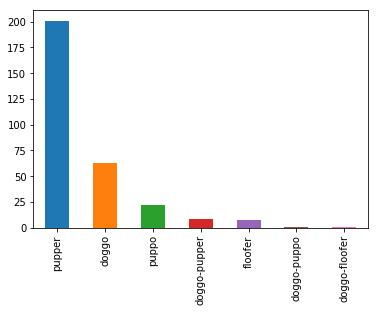

In [8]:
master_df['dog_stage'].value_counts().plot(kind='bar')

In [14]:
master_df.groupby('dog_stage')['favorite_count'].mean().round()

dog_stage
doggo            19356.0
doggo-floofer    17169.0
doggo-pupper     13220.0
doggo-puppo      47844.0
floofer          13206.0
pupper            7251.0
puppo            21582.0
Name: favorite_count, dtype: float64

In [19]:
master_df.groupby('dog_stage')['retweet_count'].mean().round()

dog_stage
doggo             7126.0
doggo-floofer     3433.0
doggo-pupper      4397.0
doggo-puppo      19196.0
floofer           4969.0
pupper            2383.0
puppo             6474.0
Name: retweet_count, dtype: float64

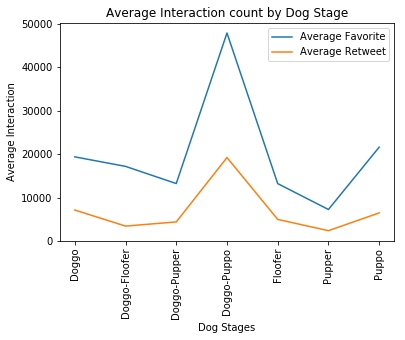

In [21]:
favorite_mean = [19356, 17169, 13220,47844, 13206, 7251, 21582 ]
retweet_mean = [7126, 3433,4397,19196, 4969, 2383, 6474]
plt.plot(favorite_mean, label='Average Favorite')
plt.plot(retweet_mean, label='Average Retweet')
labels=['Doggo', 'Doggo-Floofer', 'Doggo-Pupper', 'Doggo-Puppo','Floofer','Pupper','Puppo']
plt.xticks(range(len(labels)),labels, rotation=90)
plt.legend()
plt.title('Average Interaction count by Dog Stage')
plt.xlabel('Dog Stages')
plt.ylabel('Average Interaction');

In [31]:
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5913 entries, 0 to 5912
Data columns (total 7 columns):
tweet_id            5913 non-null int64
jpg_url             5913 non-null object
img_num             5913 non-null int64
prediction_phase    5913 non-null int64
prediction          5913 non-null object
confidence          5913 non-null float64
breed               5913 non-null bool
dtypes: bool(1), float64(1), int64(3), object(2)
memory usage: 283.0+ KB


In [45]:
image_df.groupby('prediction_phase')['breed'].value_counts()


prediction_phase  breed
1                 True     1463
                  False     508
2                 True     1480
                  False     491
3                 True     1431
                  False     540
Name: breed, dtype: int64

In [46]:
image_df.groupby('prediction_phase')['confidence'].mean()

prediction_phase
1    0.594558
2    0.134585
3    0.060166
Name: confidence, dtype: float64

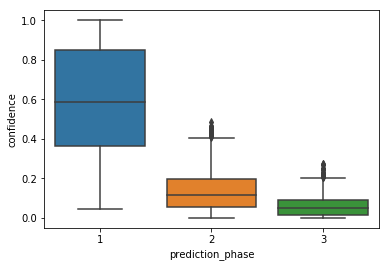

In [53]:
sns.boxplot(x="prediction_phase", y="confidence",data=image_df)

prediction
Afghan_hound                       10
African_chameleon                   1
African_crocodile                   1
African_grey                        2
African_hunting_dog                 2
Airedale                           28
American_Staffordshire_terrier     56
American_alligator                  2
American_black_bear                 5
Angora                              8
Appenzeller                        16
Arabian_camel                       9
Arctic_fox                         12
Australian_terrier                 12
Band_Aid                            1
Bedlington_terrier                 10
Bernese_mountain_dog               13
Blenheim_spaniel                   16
Border_collie                      33
Border_terrier                     17
Boston_bull                        45
Bouvier_des_Flandres                2
Brabancon_griffon                  19
Brittany_spaniel                   24
Cardigan                          112
Chesapeake_Bay_retriever           87
C

In [9]:
numenator_mean = master_df.rating_numerator.mean()
print(numenator_mean.round())

12.0


In [18]:
below_avg = master_df.query('rating_numerator == "< 12"')
above_avg = master_df.query('rating_numerator == ">= 12"')